In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date', ylabel='Close'>

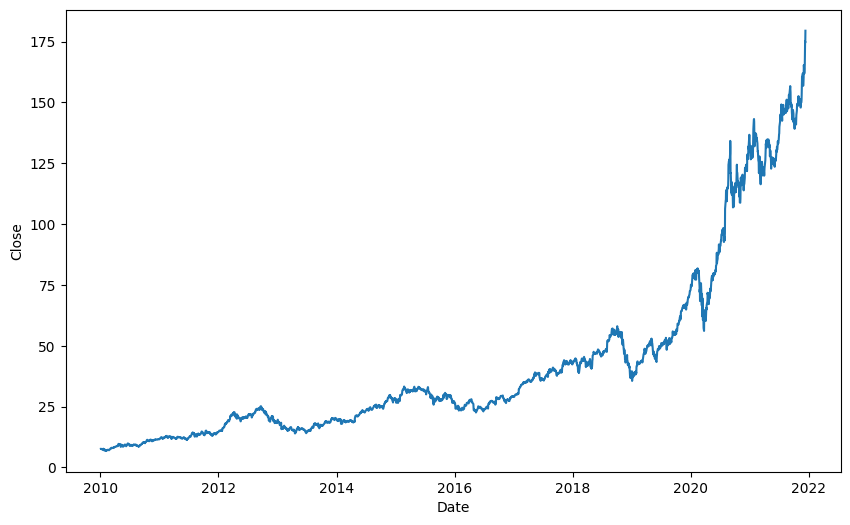

In [2]:
import yfinance as yf
start = "2010-01-01"
end = '2021-12-12'
df= yf.download('AAPL',start,end)
# df['Open'].plot(figsize=(10,6))
plt.figure(figsize=(10,6))
sns.lineplot(df['Close'])


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-06,164.289993,167.880005,164.279999,165.320007,164.115479,107497000
2021-12-07,169.080002,171.580002,168.339996,171.179993,169.932770,120405400
2021-12-08,172.130005,175.960007,170.699997,175.080002,173.804382,116998900
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.288162,108923700
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.142517,115402700


In [4]:
df.reset_index(inplace=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412871,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [6]:
df.drop(['Date','Adj Close'],axis=1,inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


<AxesSubplot: ylabel='Close'>

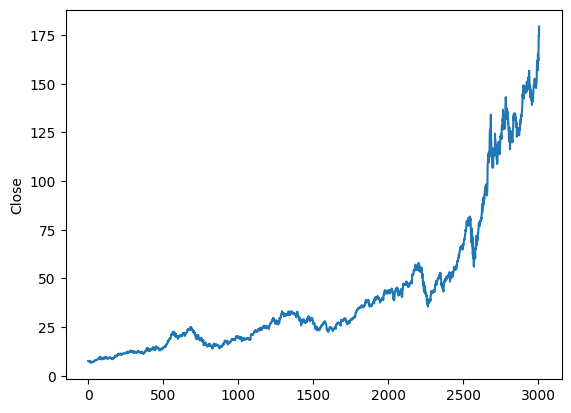

In [8]:
sns.lineplot(df['Close'])

In [9]:
# finding moving averages for 100 days
ma_100 = df['Close'].rolling(100).mean()

Text(0.5, 1.0, 'Moving average for 100 days')

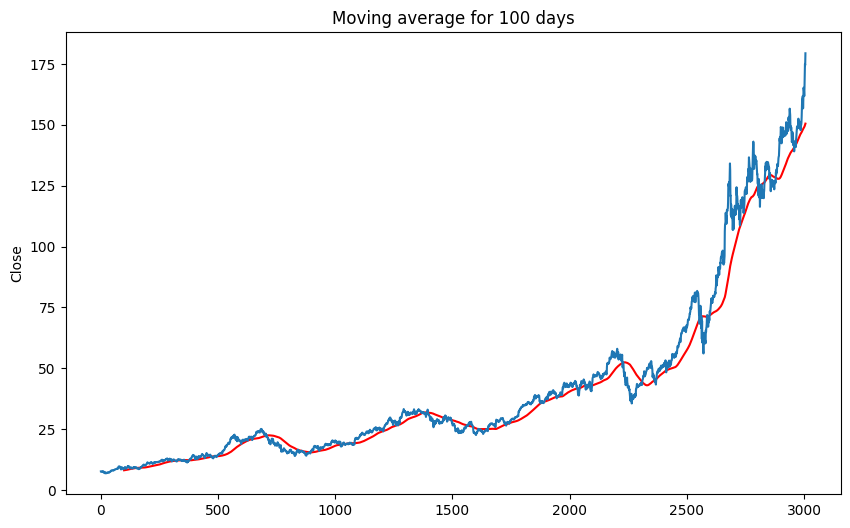

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(ma_100,color='red')
sns.lineplot(df.Close)
plt.title("Moving average for 100 days")

Text(0.5, 1.0, 'Moving average for 200 days')

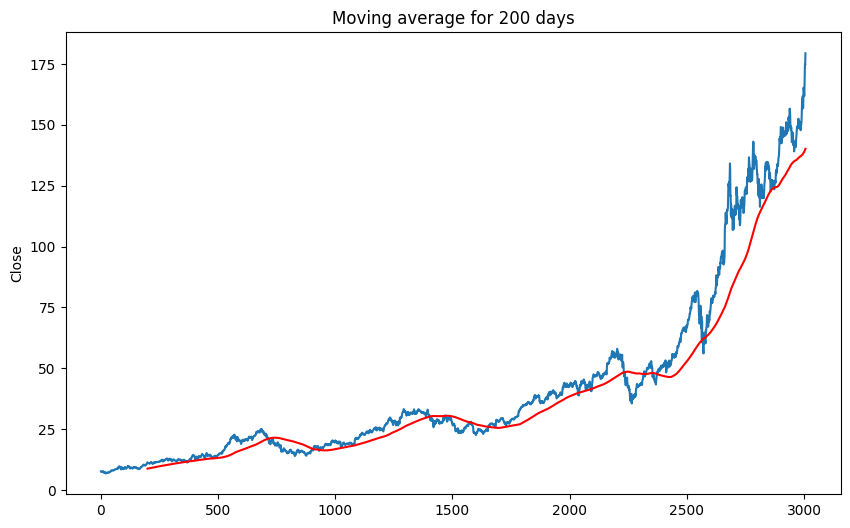

In [11]:
ma_200 = df.Close.rolling(200).mean()
plt.figure(figsize=(10,6))
sns.lineplot(df['Close'])
sns.lineplot(ma_200,color='red')
plt.title("Moving average for 200 days")

Text(0.5, 1.0, 'Close Price vs Moving Average 100 days and 200 days')

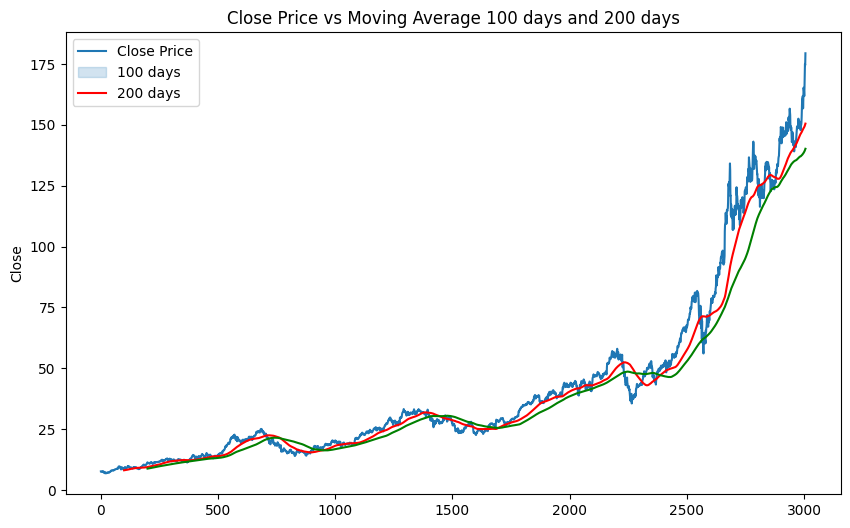

In [12]:
# plotting all three
plt.figure(figsize=(10,6))
sns.lineplot(df['Close'])
sns.lineplot(ma_100,color='red')
sns.lineplot(ma_200,color='green')
plt.legend(['Close Price','100 days','200 days'])
plt.title('Close Price vs Moving Average 100 days and 200 days')

In [13]:
# here we cann't use train test split as its a random selection process 
# but here we have to split data in series as we have to predict future value of stock

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])


In [14]:
print(data_training.shape)
print(data_testing.shape)

(2104, 1)
(903, 1)


<AxesSubplot: >

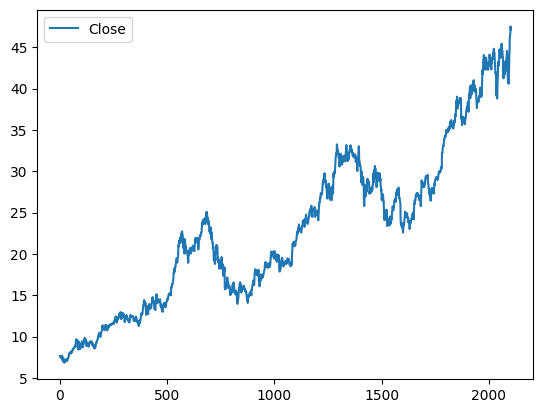

In [66]:
data_training.plot()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_scaled = scaler.fit_transform(data_training)

In [17]:
data_scaled.shape

(2104, 1)

In [18]:
x_train = []
y_train = []

for i in range(100,data_scaled.shape[0]):
    x_train.append(data_scaled[i-100:i])
    y_train.append(data_scaled[i,0])

In [19]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [21]:
x_train.shape

(2004, 100, 1)

In [20]:
# training ML model
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

2023-04-11 10:27:38.096447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-11 10:27:38.301087: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-11 10:27:38.302115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 10:27:39.567960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
model = Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # units = 1 as we have to predict only one price

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 20s 226ms/step - loss: 0.0314
Epoch 2/50
63/63 [==============================] - 17s 263ms/step - loss: 0.0078
Epoch 3/50
63/63 [==============================] - 16s 260ms/step - loss: 0.0070
Epoch 4/50
63/63 [==============================] - 16s 261ms/step - loss: 0.0062
Epoch 5/50
63/63 [==============================] - 16s 260ms/step - loss: 0.0057
Epoch 6/50
63/63 [==============================] - 17s 262ms/step - loss: 0.0057
Epoch 7/50
63/63 [==============================] - 16s 260ms/step - loss: 0.0055
Epoch 8/50
63/63 [==============================] - 17s 274ms/step - loss: 0.0051
Epoch 9/50
63/63 [==============================] - 15s 237ms/step - loss: 0.0049
Epoch 10/50
63/63 [==============================] - 18s 281ms/step - loss: 0.0047
Epoch 11/50
63/63 [==============================] - 18s 281ms/step - loss: 0.0044
Epoch 12/50
63/63 [==============================] - 19s 301ms/step - loss: 0.0043
Epoch 13/50
6

In [25]:
model.save('keras_model.h5')

In [26]:
# for prediciton of test results we need past 100 days of data
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing)

/tmp/ipykernel_4937/3401880766.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing)


In [30]:
final_df.shape

(1003, 1)

In [67]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1003, 1)

In [68]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [69]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [70]:
print(x_test.shape)
print(y_test.shape)

(903, 100, 1)
(903,)


In [71]:
# will take predictions
y_predicted = model.predict(x_test)

29/29 [==============================] - 2s 66ms/step


In [72]:
# unscaling the values
# scale factor = 1 / scaler.scale_[0]
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


In [73]:
y_predicted

array([[ 19.381891],
       [ 19.52698 ],
       [ 19.68499 ],
       [ 19.849068],
       [ 20.0128  ],
       [ 20.169924],
       [ 20.316547],
       [ 20.450092],
       [ 20.569752],
       [ 20.67555 ],
       [ 20.76819 ],
       [ 20.84825 ],
       [ 20.916143],
       [ 20.972101],
       [ 21.01862 ],
       [ 21.05959 ],
       [ 21.099268],
       [ 21.141224],
       [ 21.187124],
       [ 21.235918],
       [ 21.285421],
       [ 21.334171],
       [ 21.380146],
       [ 21.42166 ],
       [ 21.456327],
       [ 21.48207 ],
       [ 21.496914],
       [ 21.500046],
       [ 21.491316],
       [ 21.471079],
       [ 21.439112],
       [ 21.39677 ],
       [ 21.346083],
       [ 21.289824],
       [ 21.23058 ],
       [ 21.171707],
       [ 21.114355],
       [ 21.059116],
       [ 21.008335],
       [ 20.96591 ],
       [ 20.934647],
       [ 20.914244],
       [ 20.905264],
       [ 20.90815 ],
       [ 20.922066],
       [ 20.945818],
       [ 20.97714 ],
       [ 21.0

In [82]:
# plotting predictions along with actual values

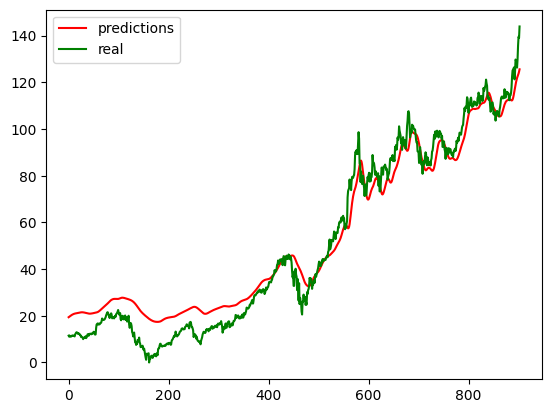

In [76]:
plt.plot(y_predicted,'r')
plt.plot(y_test,'g')
plt.legend(['predictions','real'])